# 基于 VGG 的 FashionMNIST 数据集的分类
## VGG
### 基本架构：
VGG 相较于 AlexNet 使用了模块化设计，通过定义 VGG 块可以进行重复堆叠，从而进一步加深网络层数。

输入：图片（$3\times 224\times 224$）

模块一：

1. 
- $3\times 3$ 卷积层（64）,填充为 1
- ReLU 函数激活
- $2\times 2$ 最大汇聚层，步幅为 2 （64@112*112）
2. 
- $3\times 3$ 卷积层（128）,填充为 1
- ReLU 函数激活
- $2\times 2$ 最大汇聚层，步幅为 2 （128@56*56）

模块二：

3. 
- $3\times 3$ 卷积层（256）,填充为 1
- ReLU 函数激活
- $3\times 3$ 卷积层（256）,填充为 1
- ReLU 函数激活
- $2\times 2$ 最大汇聚层，步幅为 2 （256@28*28）

4. 
- $3\times 3$ 卷积层（512）,填充为 1
- ReLU 函数激活
- $3\times 3$ 卷积层（512）,填充为 1
- ReLU 函数激活
- $2\times 2$ 最大汇聚层，步幅为 2 （512@14*14）

5. 
- $3\times 3$ 卷积层（512）,填充为 1
- ReLU 函数激活
- $3\times 3$ 卷积层（512）,填充为 1
- ReLU 函数激活
- $2\times 2$ 最大汇聚层，步幅为 2 （512@7*7）

6. 
- Flatten 展平
- 全连接层（512\*7*7,4096）
- ReLU 函数激活
- Dropout(0.5)
- 全连接层（4096，4096）
- ReLU 函数激活
- Dropout(0.5)
- 全连接层（4096，1000）
- softmax 函数分类输出

输出：1000 个类别样本

### 创新特点
1. 使用了 VGG 块，标志着卷积神经网络从层状向块状发展。

In [4]:
# imports
import basic
from torch import nn
from torch import optim
import torch

class VGG(basic.Net):
    def __init__(self):
        super(basic.Net).__init__()
        conv_arch = ((1,64),(1,128), (2,256), (2,512), (2,152))
        self.VGG11(conv_arch)

    @staticmethod
    def vgg_block(num_convs, in_channels, out_channels):
        """
        VGG Block:
        inputs: num_convs, in_channels, out_channels
        outputs: VGG Block
        """
        layers = []
        for _ in range(num_convs):
            layers.append(
                nn.Conv2d(kernel_size=3, padding=1,in_channels=in_channels,out_channels=out_channels))
            layers.append(nn.ReLU())
            in_channels = out_channels
        layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        return nn.Sequential(*layers)

    # Construct VGG-11 
    def VGG11(self,conv_arch):
        """
        VGG-11
        inputs: net structure
        output: VGG-11
        """
        conv_blks = []
        in_channels = 1
        # Conv Part
        for(num_convs,out_channels) in conv_arch:
            conv_blks.append(self.vgg_block(num_convs, in_channels, out_channels))
            in_channels = out_channels

        # Add Linear Part
        self.net = nn.Sequential(
            *conv_blks,
            nn.Flatten(),
            nn.Linear(out_channels*7*7, 4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096,10))

['pullover', 'trouser', 'dress', 't-shirt']


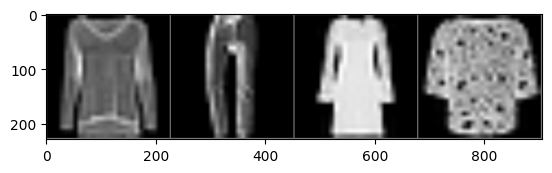

In [7]:
ROOT = "./data"
Model_PATH = "./model/VGG"
BatchSize = 128
optimizer = optim.SGD
criterion = nn.CrossEntropyLoss()

trains, tests, labels = basic.load_FashionMNIST_datasets(BatchSize,224,ROOT)
basic.show_some_samples(trains,labels)

In [8]:
vgg = VGG()
vgg.train(trains,criterion,optimizer,epochs=5)
torch.save(vgg.net,Model_PATH)

Training on!


 20%|██        | 1/5 [07:48<31:14, 468.66s/it]

epoch 1, avg_loss: 0.8386771637532446



 40%|████      | 2/5 [13:25<19:33, 391.27s/it]

epoch 2, avg_loss: 0.3385686277706399



 60%|██████    | 3/5 [18:59<12:09, 364.96s/it]

epoch 3, avg_loss: 0.2745402348824801



 80%|████████  | 4/5 [24:36<05:53, 353.86s/it]

epoch 4, avg_loss: 0.24267174407011932



100%|██████████| 5/5 [30:16<00:00, 363.37s/it]


epoch 5, avg_loss: 0.21418448969021311
Finish Training!


In [ ]:
vgg.net = torch.load(Model_PATH)
vgg.accuracy(tests)
vgg.label_accuracy(tests,labels)

Total Accuracy:  91.63
